In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
class GaussDiscriminant():
    def __init__(self,mu0=0,mu1=0,sigma=0):
        self.phi1=0
        self.phi0=0
        self.mu0=mu0
        self.mu1=mu1
        self.sigma=sigma
        self.index0=0
        self.index1=0
        self.probability=0
        self.predict_type=0
        
    def GaussMass(self,X):
        n=len(X[0])
        det=np.linalg.det(self.sigma)
        inverse=np.linalg.inv(self.sigma)
        matrix0=(X-self.mu0)
        matrix1=(X-self.mu1)
        row,column=matrix0.shape
        sigma0=-(1/2)*((matrix0.dot(inverse)).dot(matrix0.reshape((column,row))))
        sigma1=-(1/2)*((matrix1.dot(inverse)).dot(matrix1.reshape((column,row))))
        sigma0=np.diagonal(sigma0)
        sigma1=np.diagonal(sigma1)
        p0=(1/np.power(2*np.pi,n/2))*np.exp(sigma0)
        p1=(1/np.power(2*np.pi,n/2))*np.exp(sigma1)
        return p0,p1
        
        
    def fit(self,X,y):
        N=len(y)
        self.phi1=np.sum(y)/N
        self.phi0=1-np.sum(y)/N
        self.index0=np.argwhere(y==0).flatten()
        self.index1=np.argwhere(y==1).flatten()
        X0=X[self.index0,:]
        X1=X[self.index1,:]
        self.mu0=np.sum(X0,axis=0)/len(X0)
        self.mu1=np.sum(X1,axis=0)/len(X1)
        X_sigma0=X0-self.mu0
        X_sigma1=X1-self.mu1
        vector_len=len(X0[0])
        sigma1=np.zeros((vector_len,vector_len))
        for i in range(len(X0)):
            sigma1=sigma1+(X_sigma0[i].reshape((vector_len,1))).dot(X_sigma0[i].reshape((1,vector_len)))
        sigma2=np.zeros((sigma1.shape[0],sigma1.shape[1]))
        for j in range(len(X1)):
            sigma2=sigma2+(X_sigma1[j].reshape((vector_len,1))).dot(X_sigma1[j].reshape((1,vector_len)))
        self.sigma=sigma1+sigma2  
        
    def probablity(self,X):
        row0,row1=self.GaussMass(X)
        class_type=np.array([row0,row1])
        prob_y=np.array([self.phi0,self.phi1]).reshape((2,1))
        chass_type1=prob_y*class_type
        chass_type2=np.sum(chass_type1,axis=0)
        class_type3=(1/chass_type2)*chass_type1
        self.probability=class_type3
        return class_type3
        
    def predict(self,X):
        probablity=self.probablity(X)
        predict_type=np.argmax(probablity,axis=0)
        self.predict_type=predict_type
        return predict_type 
    
    def score(self,y):
        predict=self.predict_type
        return np.sum(np.where(y==predict,1,0))/len(y)

In [3]:
data=load_iris()

In [4]:
binary_data_index=np.argwhere(data['target']!=2).flatten()
X=data['data'][binary_data_index,2:]
y=data['target'][binary_data_index]

In [5]:
index0=np.argwhere(y==0).flatten()
index1=np.argwhere(y==1).flatten()
X0=X[index0,:]
X1=X[index1,:]

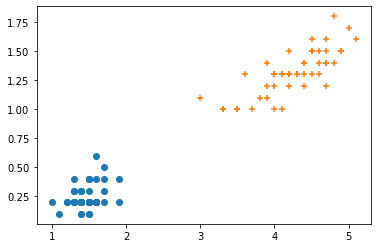

In [6]:
plt.scatter(X0[:,0],X0[:,1],marker='o')
plt.scatter(X1[:,0],X1[:,1],marker='+')

In [7]:
gauss=GaussDiscriminant()

In [8]:
gauss.fit(X,y)

In [9]:
gauss.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
gauss.score(y)

0.98